In [1]:
import pandas as pd
import psycopg2
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Connect to PostgreSQL
conn = psycopg2.connect(
    dbname="movielens100k",
    user="postgres",
    password="siddhesh",
    host="localhost",
    port="5432"
)

In [3]:
# 1. Load ratings data
ratings = pd.read_sql("SELECT * FROM ratings", conn)
movies = pd.read_sql("SELECT * FROM movies", conn)
users = pd.read_sql("SELECT * FROM users", conn)


C:\Users\siddhesh.mengade\AppData\Local\Temp\ipykernel_4492\3561848310.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  ratings = pd.read_sql("SELECT * FROM ratings", conn)
C:\Users\siddhesh.mengade\AppData\Local\Temp\ipykernel_4492\3561848310.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  movies = pd.read_sql("SELECT * FROM movies", conn)
C:\Users\siddhesh.mengade\AppData\Local\Temp\ipykernel_4492\3561848310.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  users = pd.read_sql("SELECT * FROM users", conn)


In [4]:
# 2. Basic counts
print(f"Total Users: {users['user_id'].nunique()}")
print(f"Total Movies: {movies['movie_id'].nunique()}")
print(f"Total Ratings: {ratings.shape[0]}")


Total Users: 943
Total Movies: 1682
Total Ratings: 100000


In [5]:
# 3. Top 10 most popular movies
top_movies = ratings.groupby("movie_id").size().sort_values(ascending=False).head(10)
top_movies = top_movies.reset_index(name="rating_count")
top_movies = top_movies.merge(movies, on="movie_id")


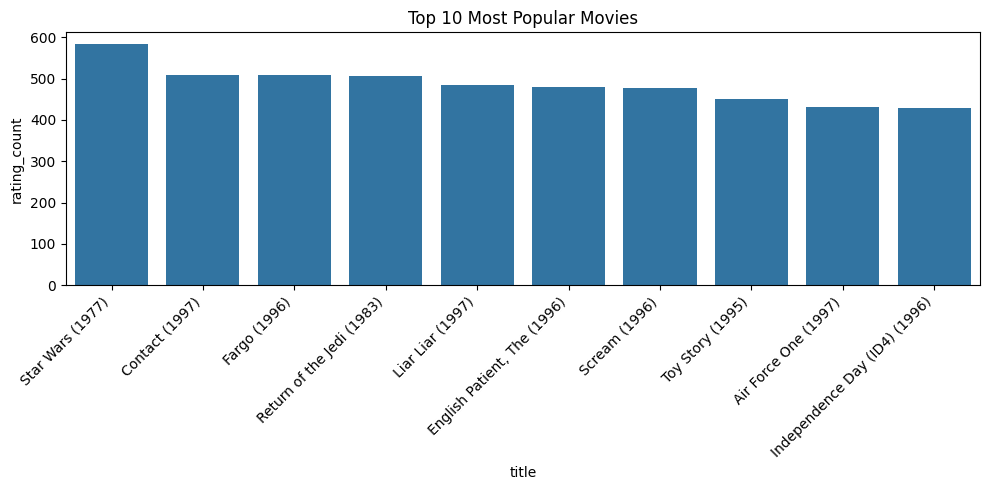

In [6]:
plt.figure(figsize=(10, 5))
sns.barplot(data=top_movies, x="title", y="rating_count")
plt.title("Top 10 Most Popular Movies")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

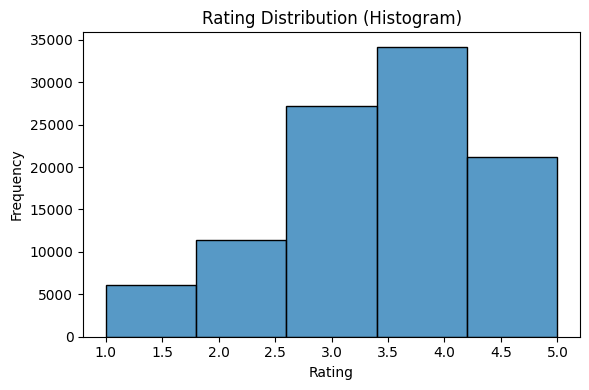

In [7]:
# 4. Rating distribution
plt.figure(figsize=(6, 4))
sns.histplot(ratings["rating"], bins=5, kde=False)
plt.title("Rating Distribution (Histogram)")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

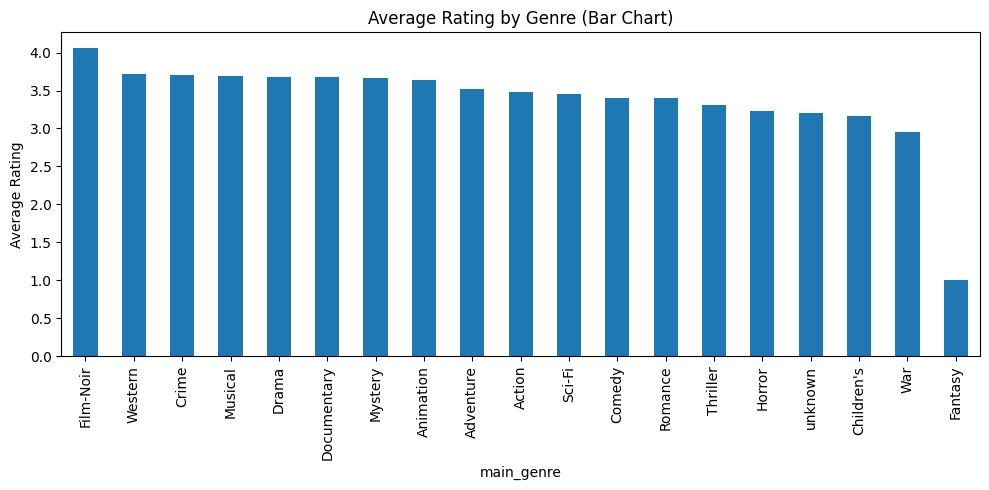

In [8]:
# 5. Average rating by genre (take first genre if multiple)
movies["main_genre"] = movies["genre"].apply(lambda x: x.split(", ")[0] if pd.notnull(x) else None)
genre_avg = ratings.merge(movies, on="movie_id").groupby("main_genre")["rating"].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
genre_avg.plot(kind="bar")
plt.title("Average Rating by Genre (Bar Chart)")
plt.ylabel("Average Rating")
plt.tight_layout()
plt.show()

In [9]:
# 6. Most active users
most_active = ratings.groupby("user_id").size().sort_values(ascending=False).head(5)
print("\nMost Active Users:\n", most_active)



Most Active Users:
 user_id
405    737
655    685
13     636
450    540
276    518
dtype: int64


In [10]:
# 7. Highest-rated movies (with at least 50 ratings)
movie_avg = ratings.groupby("movie_id").agg(avg_rating=("rating", "mean"), count=("rating", "count"))
movie_avg = movie_avg[movie_avg["count"] >= 50].sort_values("avg_rating", ascending=False).head(10)
top_rated = movie_avg.merge(movies, on="movie_id")
print("\nTop Rated Movies (≥ 50 ratings):\n", top_rated[["title", "avg_rating", "count"]])



Top Rated Movies (≥ 50 ratings):
                                                title  avg_rating  count
0                              Close Shave, A (1995)    4.491071    112
1                            Schindler's List (1993)    4.466443    298
2                         Wrong Trousers, The (1993)    4.466102    118
3                                  Casablanca (1942)    4.456790    243
4  Wallace & Gromit: The Best of Aardman Animatio...    4.447761     67
5                   Shawshank Redemption, The (1994)    4.445230    283
6                                 Rear Window (1954)    4.387560    209
7                         Usual Suspects, The (1995)    4.385768    267
8                                   Star Wars (1977)    4.358491    583
9                                12 Angry Men (1957)    4.344000    125


In [11]:
conn.close()